In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pip install pandas-ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 KB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=3b1ff53de0c65dcea04c0001eedd7d58690e2a434c623df342869e9d84641305
  Stored in directory: /root/.cache/pip/wheels/54/4a/75/06b8e63fce6f6d2c1baae5c208edb18eca128407b0c96e1153
Successfully built pandas-ta


In [3]:
import pandas_ta as ta

In [65]:
eurusd_h4 = pd.read_excel('/content/Data EURUSD 4H.xlsx')
eurusd_h4

,datetime,close
0,2019-01-02 05:00:00,1.14526
1,2019-01-02 09:00:00,1.14784
2,2019-01-02 13:00:00,1.14338
3,2019-01-02 17:00:00,1.13720
4,2019-01-02 21:00:00,1.13356
...,...,...
6360,2023-02-01 05:00:00,1.08572
6361,2023-02-01 09:00:00,1.08717
6362,2023-02-01 13:00:00,1.08739
6363,2023-02-01 17:00:00,1.08572


In [66]:
eurusd_h4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6365 entries, 0 to 6364
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  6365 non-null   datetime64[ns]
 1   close     6365 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 99.6 KB


In [67]:
eurusd_h4.set_index('datetime', inplace=True)
eurusd_h4

,close
datetime,
2019-01-02 05:00:00,1.14526
2019-01-02 09:00:00,1.14784
2019-01-02 13:00:00,1.14338
2019-01-02 17:00:00,1.13720
2019-01-02 21:00:00,1.13356
...,...
2023-02-01 05:00:00,1.08572
2023-02-01 09:00:00,1.08717
2023-02-01 13:00:00,1.08739


In [68]:
# Adding indicator

#eurusd_h4['RSI 14'] = ta.rsi(eurusd_h4.close, length=14)
eurusd_h4['EMA 20'] = ta.ema(eurusd_h4.close, length=20)
eurusd_h4['EMA 50'] = ta.ema(eurusd_h4.close, length=50)
eurusd_h4['EMA 100'] = ta.ema(eurusd_h4.close, length=100)
eurusd_h4['EMA 200'] = ta.ema(eurusd_h4.close, length=200)

eurusd_h4

,close,EMA 20,EMA 50,EMA 100,EMA 200
datetime,,,,,
2019-01-02 05:00:00,1.14526,NaN,NaN,NaN,NaN
2019-01-02 09:00:00,1.14784,NaN,NaN,NaN,NaN
2019-01-02 13:00:00,1.14338,NaN,NaN,NaN,NaN
2019-01-02 17:00:00,1.13720,NaN,NaN,NaN,NaN
2019-01-02 21:00:00,1.13356,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2023-02-01 05:00:00,1.08572,1.086433,1.085832,1.081821,1.072249
2023-02-01 09:00:00,1.08717,1.086503,1.085885,1.081927,1.072397
2023-02-01 13:00:00,1.08739,1.086587,1.085944,1.082035,1.072546


In [69]:
eurusd_h4.isnull().sum()

close        0
EMA 20      19
EMA 50      49
EMA 100     99
EMA 200    199
dtype: int64

In [70]:
# Handling missing value

eurusd_h4.dropna(inplace=True)
eurusd_h4

,close,EMA 20,EMA 50,EMA 100,EMA 200
datetime,,,,,
2019-02-18 09:00:00,1.13084,1.129355,1.131920,1.135233,1.139592
2019-02-18 13:00:00,1.13156,1.129565,1.131905,1.135161,1.139512
2019-02-18 17:00:00,1.13220,1.129816,1.131917,1.135102,1.139439
2019-02-18 21:00:00,1.13110,1.129938,1.131885,1.135023,1.139356
2019-02-19 01:00:00,1.13106,1.130045,1.131853,1.134944,1.139274
...,...,...,...,...,...
2023-02-01 05:00:00,1.08572,1.086433,1.085832,1.081821,1.072249
2023-02-01 09:00:00,1.08717,1.086503,1.085885,1.081927,1.072397
2023-02-01 13:00:00,1.08739,1.086587,1.085944,1.082035,1.072546


In [71]:
eurusd_h4.isnull().sum()

close      0
EMA 20     0
EMA 50     0
EMA 100    0
EMA 200    0
dtype: int64

In [72]:
# Membagi data train dan test

training_set = eurusd_h4.iloc[:6066].values
training_set

array([[1.13084   , 1.12935499, 1.13191954, 1.13523342, 1.1395921 ],
       [1.13156   , 1.12956499, 1.13190545, 1.13516068, 1.13951218],
       [1.1322    , 1.12981594, 1.131917  , 1.13510205, 1.13943942],
       ...,
       [1.07502   , 1.06303417, 1.0620629 , 1.06026688, 1.05180598],
       [1.07338   , 1.06401949, 1.0625067 , 1.06052654, 1.05202065],
       [1.07364   , 1.06493572, 1.0629433 , 1.06078622, 1.05223576]])

In [73]:
training_set.shape

(6066, 5)

In [74]:
test_set = eurusd_h4.iloc[6066:].values
test_set

array([[1.07428   , 1.06582566, 1.06338788, 1.06105342, 1.05245511],
       [1.07461   , 1.06666226, 1.06382796, 1.06132187, 1.05267556],
       [1.07216   , 1.06718585, 1.06415471, 1.06153648, 1.05286943],
       [1.07335   , 1.06777292, 1.06451531, 1.06177041, 1.05307322],
       [1.07342   , 1.06831073, 1.06486451, 1.0620011 , 1.05327567],
       [1.0731    , 1.06876685, 1.06518747, 1.06222088, 1.05347293],
       [1.07476   , 1.06933763, 1.06556287, 1.06246918, 1.05368474],
       [1.07416   , 1.0697969 , 1.06590001, 1.06270068, 1.05388848],
       [1.07498   , 1.07029053, 1.06625609, 1.06294383, 1.05409834],
       [1.07468   , 1.07070858, 1.06658644, 1.06317623, 1.05430313],
       [1.07579   , 1.07119252, 1.06694736, 1.06342601, 1.05451693],
       [1.07667   , 1.07171419, 1.06732864, 1.06368827, 1.05473736],
       [1.07628   , 1.07214903, 1.06767967, 1.06393761, 1.05495172],
       [1.07654   , 1.07256721, 1.06802714, 1.06418716, 1.05516653],
       [1.08292   , 1.07355319, 1.

In [75]:
test_set.shape

(100, 5)

In [76]:
# Feature scaling

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
training_set_scaled, test_set_scaled = sc.fit_transform(training_set), sc.fit_transform(test_set)
training_set_scaled, test_set_scaled

(array([[0.63047455, 0.62197557, 0.62347024, 0.64185953, 0.6731993 ],
        [0.63305714, 0.62276824, 0.62341417, 0.6415614 , 0.67285169],
        [0.63535277, 0.62371548, 0.6234601 , 0.64132112, 0.67253525],
        ...,
        [0.43025216, 0.37164194, 0.34570002, 0.33460915, 0.29138855],
        [0.4243696 , 0.3753611 , 0.34746473, 0.33567339, 0.29232221],
        [0.4253022 , 0.37881952, 0.34920077, 0.33673766, 0.29325782]]),
 array([[0.10728745, 0.        , 0.        , 0.        , 0.        ],
        [0.12398785, 0.03661479, 0.01938604, 0.01268942, 0.01082398],
        [0.        , 0.0595304 , 0.03377951, 0.02283429, 0.02034329],
        [0.06022267, 0.08522372, 0.04966424, 0.03389214, 0.03034927],
        [0.06376518, 0.10876182, 0.06504696, 0.04479655, 0.04028988],
        [0.04757085, 0.12872438, 0.07927364, 0.05518551, 0.04997524],
        [0.13157895, 0.15370494, 0.09581004, 0.06692255, 0.06037524],
        [0.10121457, 0.17380548, 0.11066146, 0.07786556, 0.07037862],
     

In [77]:
test_set_scaled.shape

(100, 5)

In [78]:
eurusd_h4.shape[1]

5

In [81]:
# Membuat struktur data dengan 60 timestep dan 1 output

X_train = []
y_train = []

n_future = 6   # Number of days we want top predict into the future
n_past = 60     # Number of past days we want to use to predict the future

for i in range(n_past, len(training_set_scaled) - n_past):
    X_train.append(training_set_scaled[i - n_past:i, 0:eurusd_h4.shape[1]])
    y_train.append(training_set_scaled[i + n_future - 1:i + n_future, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (5946, 60, 5).
y_train shape == (5946, 1).


In [101]:
X_test = []
y_test = []

n_future = 6   
n_past = 60    

for i in range(n_past, len(test_set_scaled) - n_future +1):
    X_test.append(test_set_scaled[i - n_past:i, 0:eurusd_h4.shape[1]])
    y_test.append(test_set_scaled[i + n_future - 1:i + n_future, 0])

X_test, y_test = np.array(X_test), np.array(y_test)

print('X_test shape == {}.'.format(X_test.shape))
print('y_test shape == {}.'.format(y_test.shape))

X_test shape == (35, 60, 5).
y_test shape == (35, 1).


In [102]:
X_train.shape[2]

5

In [103]:
# Membangun dan melatih model

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU, Bidirectional
from keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

In [104]:
model = Sequential()

In [105]:
# RNN arsitektur

model.add(LSTM(units=500, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=200, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dense(units=1))

In [106]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 500)           1012000   
                                                                 
 dropout_6 (Dropout)         (None, 60, 500)           0         
                                                                 
 lstm_7 (LSTM)               (None, 60, 200)           560800    
                                                                 
 dropout_7 (Dropout)         (None, 60, 200)           0         
                                                                 
 lstm_8 (LSTM)               (None, 100)               120400    
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,693,301
Trainable params: 1,693,301
No

In [107]:
# Compiling RNN

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Menerapkan callbacks

#checkpointer = ModelCheckpoint(filepath = 'weights_best.hdf5',  
                               #save_best_only = True)

In [108]:
# Melatih RNN pada training set

model.fit(X_train, y_train, validation_data=[X_test, y_test], epochs=30, batch_size=42)

Epoch 1/30
142/142 [==============================] - 88s 592ms/step - loss: 0.0057 - val_loss: 0.0263
Epoch 2/30
142/142 [==============================] - 83s 583ms/step - loss: 0.0012 - val_loss: 0.0248
Epoch 3/30
142/142 [==============================] - 84s 590ms/step - loss: 0.0013 - val_loss: 0.0189
Epoch 4/30
142/142 [==============================] - 83s 582ms/step - loss: 9.2756e-04 - val_loss: 0.0243
Epoch 5/30
142/142 [==============================] - 83s 582ms/step - loss: 8.1489e-04 - val_loss: 0.0183
Epoch 6/30
142/142 [==============================] - 83s 588ms/step - loss: 8.3957e-04 - val_loss: 0.0241
Epoch 7/30
142/142 [==============================] - 83s 585ms/step - loss: 7.3205e-04 - val_loss: 0.0148
Epoch 8/30
142/142 [==============================] - 84s 592ms/step - loss: 7.2166e-04 - val_loss: 0.0192
Epoch 9/30
142/142 [==============================] - 83s 584ms/step - loss: 7.7703e-04 - val_loss: 0.0161
Epoch 10/30
142/142 [============================

In [109]:
predictions_test = model.predict(X_test[-100:])

2/2 [==============================] - 1s 33ms/step


In [110]:
predictions_test

array([[0.79058427],
       [0.8097893 ],
       [0.79868895],
       [0.7819142 ],
       [0.7940504 ],
       [0.8225814 ],
       [0.853306  ],
       [0.8791201 ],
       [0.87245166],
       [0.84371513],
       [0.85449266],
       [0.90042037],
       [0.94555175],
       [0.9721747 ],
       [0.95416844],
       [0.93815064],
       [0.8767588 ],
       [0.8558423 ],
       [0.8572236 ],
       [0.8425612 ],
       [0.8386346 ],
       [0.8078639 ],
       [0.7821675 ],
       [0.769514  ],
       [0.775056  ],
       [0.77811164],
       [0.8266526 ],
       [0.84965175],
       [0.8141192 ],
       [0.75910926],
       [0.7234598 ],
       [0.67457855],
       [0.62530243],
       [0.6246957 ],
       [0.6705598 ]], dtype=float32)

In [111]:
prediction_copies = np.repeat(predictions_test, training_set.shape[1], axis=-1)
y_test_pred = sc.inverse_transform(prediction_copies)[:,0]
y_test_pred = y_test_pred.reshape(-1, 1)
y_test_pred

array([[1.0877819],
       [1.0881615],
       [1.087942 ],
       [1.0876106],
       [1.0878505],
       [1.0884142],
       [1.0890213],
       [1.0895314],
       [1.0893997],
       [1.0888318],
       [1.0890448],
       [1.0899523],
       [1.0908442],
       [1.0913702],
       [1.0910144],
       [1.0906979],
       [1.0894848],
       [1.0890715],
       [1.0890987],
       [1.088809 ],
       [1.0887314],
       [1.0881234],
       [1.0876156],
       [1.0873655],
       [1.0874751],
       [1.0875355],
       [1.0884947],
       [1.0889491],
       [1.088247 ],
       [1.08716  ],
       [1.0864556],
       [1.0854897],
       [1.0845159],
       [1.084504 ],
       [1.0854102]], dtype=float32)

In [112]:
y_test_pred.shape

(35, 1)

In [113]:
y_test_actual = eurusd_h4['close'].iloc[6131:].values
y_test_actual = y_test_actual.reshape(-1, 1)
y_test_actual

array([[1.08932],
       [1.08976],
       [1.08814],
       [1.08722],
       [1.08992],
       [1.09152],
       [1.09192],
       [1.09188],
       [1.08958],
       [1.09026],
       [1.08648],
       [1.08912],
       [1.08896],
       [1.08738],
       [1.08838],
       [1.08622],
       [1.08666],
       [1.08679],
       [1.08736],
       [1.08692],
       [1.0902 ],
       [1.08862],
       [1.08578],
       [1.08517],
       [1.08578],
       [1.08348],
       [1.08299],
       [1.0851 ],
       [1.08654],
       [1.08632],
       [1.08572],
       [1.08717],
       [1.08739],
       [1.08572],
       [1.08717]])

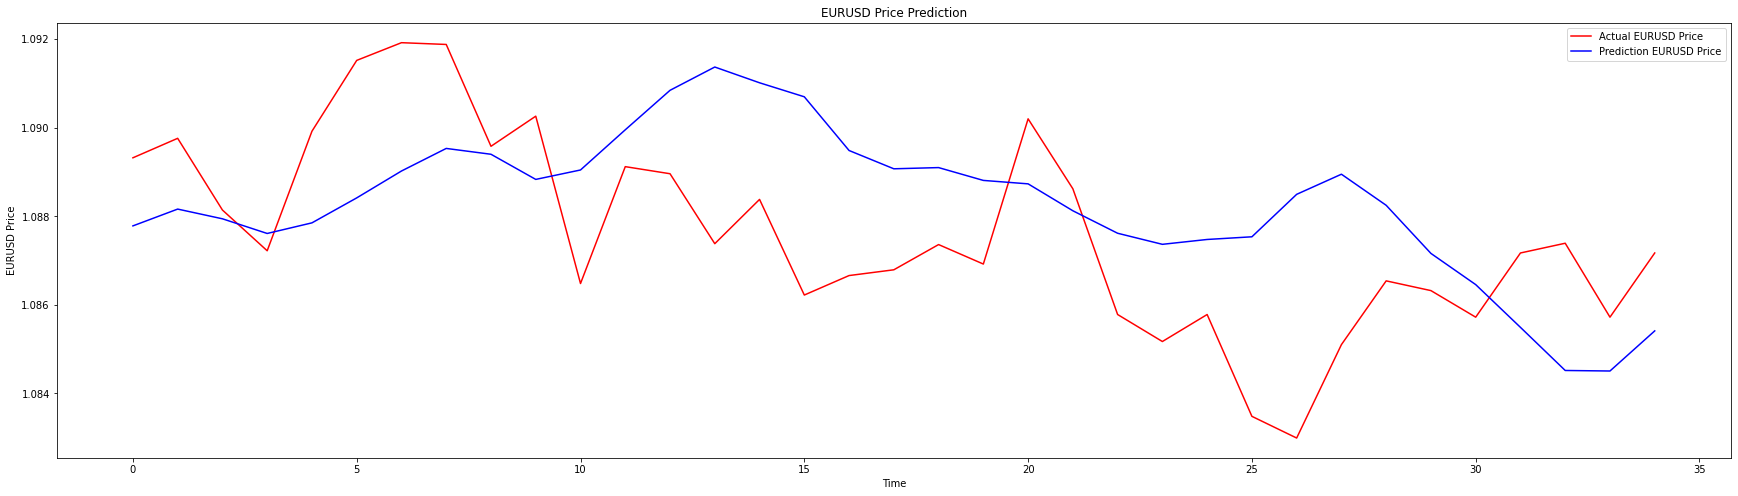

In [114]:
plt.figure(figsize = (30, 8))
plt.plot(y_test_actual, color = 'red', label = 'Actual EURUSD Price')
plt.plot(y_test_pred, color = 'blue', label = 'Prediction EURUSD Price')
plt.title('EURUSD Price Prediction')
plt.xlabel('Time')
plt.ylabel('EURUSD Price')
plt.legend()
plt.show()

In [115]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
mae, rmse, mape = math.sqrt(mean_absolute_error(y_test_actual, y_test_pred)), math.sqrt(mean_squared_error(y_test_actual, y_test_pred)), math.sqrt(mean_absolute_percentage_error(y_test_actual, y_test_pred))
mae, rmse, mape

(0.045603056466295054, 0.0024106451664009276, 0.04373589715080821)